In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torchvision import datasets
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch.optim import SGD, Adam, Adadelta, Adagrad, RMSprop

In [3]:
fmnist = datasets.FashionMNIST(root='./data', train=True, download=True)
tr_images = fmnist.data
tr_targets = fmnist.targets
tr_images.shape, tr_targets.shape

(torch.Size([60000, 28, 28]), torch.Size([60000]))

In [4]:
val_fmnist = datasets.FashionMNIST(root='./data', train=False, download=True)
val_images = val_fmnist.data
val_targets = val_fmnist.targets
val_images.shape, val_targets.shape

(torch.Size([10000, 28, 28]), torch.Size([10000]))

In [5]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


### Training the neural net without batch normalization

In [5]:
class FMNISTDataset(Dataset):
    def __init__(self, x, y):
        x = x.float()/(255 * 10000)
        x = x.view(-1, 28 * 28)
        self.x, self.y = x, y
    def __getitem__(self, ix):
        x, y = self.x[ix], self.y[ix]
        return x.to(device), y.to(device)
    def __len__(self):
        return len(self.x)
        

In [6]:
def get_model():
    class neuralnet(nn.Module):
        def __init__(self):
            super().__init__()
            self.input_to_hidden_layer = nn.Linear(28 * 28, 1000)
            self.hidden_layer_activation = nn.ReLU()
            self.hidden_to_output_layer = nn.Linear(1000, 10)
        def forward(self, x):
            x = self.input_to_hidden_layer(x)
            x1 = self.hidden_layer_activation(x)
            x2 = self.hidden_to_output_layer(x1)
            return x2, x1
    SNet = neuralnet().to(device)
    loss_fn = nn.CrossEntropyLoss()
    optimizer = Adam(SNet.parameters(), lr=1e-3)
    return SNet, loss_fn, optimizer

In [7]:
def train_batch(x, y, SNet, optimizer, loss_fn):
    prediction = SNet(x)[0]
    batch_loss = loss_fn(prediction, y)
    batch_loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    return batch_loss.item()

In [8]:
def accuracy(x, y, SNet):
    with torch.no_grad():
        prediction = SNet(x)[0]
    max_values, argmaxes = prediction.max(-1)
    is_correct = argmaxes == y
    return is_correct.cpu().numpy().tolist()

In [9]:
def get_data():
    train = FMNISTDataset(tr_images, tr_targets)
    trn_dl = DataLoader(train, batch_size=32, shuffle=True)
    val = FMNISTDataset(val_images, val_targets)
    val_dl = DataLoader(val, batch_size=len(val_images), shuffle=True)
    return trn_dl, val_dl

In [16]:
trn_dl, val_dl = get_data() 
SNet, loss_fn, optimizer = get_model()

In [17]:
@torch.no_grad()
def val_loss(x, y, SNet):
    SNet.eval()
    prediction = SNet(x)[0]
    val_loss = loss_fn(prediction, y)
    return val_loss.item()

In [18]:
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []
for epoch in range(100):
    print(epoch)
    train_epoch_losses, train_epoch_accuracies = [], []
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, SNet, optimizer, loss_fn)
        train_epoch_losses.append(batch_loss)
    train_epoch_loss = np.array(train_epoch_losses).mean()
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, SNet)
        train_epoch_accuracies.extend(is_correct)
    train_epoch_accuracy = np.mean(train_epoch_accuracies)
    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        val_is_correct = accuracy(x, y, SNet)
        validation_loss = val_loss(x, y, SNet)
    val_epoch_accuracy = np.mean(val_is_correct)
    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_losses.append(validation_loss)  
    val_accuracies.append(val_epoch_accuracy)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [19]:
train_losses, train_accuracies, val_losses, val_accuracies

([1.7753029307047525,
  1.107465387026469,
  0.9018876339276631,
  0.790184464597702,
  0.7298286545912425,
  0.6912446504116059,
  0.6649073129971822,
  0.6441448039929072,
  0.627698690923055,
  0.6121420696258545,
  0.5981774569590886,
  0.586769169219335,
  0.5753704927206039,
  0.5645290441433589,
  0.5552679787317911,
  0.5457714141050974,
  0.5388909684816996,
  0.530485721786817,
  0.5230803002516429,
  0.5170960869550705,
  0.5107774299701054,
  0.5056083436012269,
  0.5014511866927147,
  0.4960150955080986,
  0.49058143889109296,
  0.4860631487806638,
  0.4827298703988393,
  0.4797624969244003,
  0.47485192445119223,
  0.47167464680671695,
  0.468972122836113,
  0.4658145900408427,
  0.4635126169403394,
  0.46082816168467206,
  0.4575869021375974,
  0.4542383221228917,
  0.4519258580128352,
  0.4511612699270248,
  0.4471155120293299,
  0.44588227617740633,
  0.44365646164417266,
  0.44134954604705173,
  0.43907525056203206,
  0.4381462903022766,
  0.43579637422561646,
  0.434

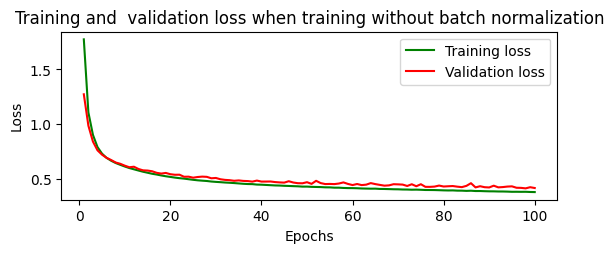

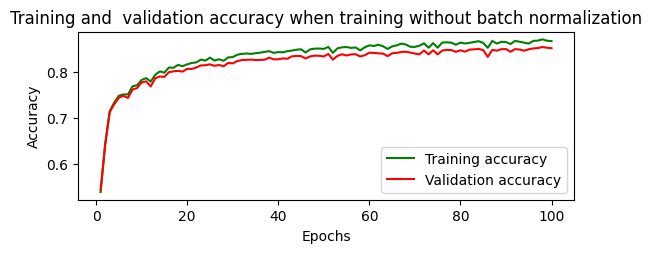

In [21]:
# Plotting the training and validation loss values
epochs = np.arange(100) + 1
plt.subplot(211)
plt.plot(epochs, train_losses, "g", label="Training loss")
plt.plot(epochs, val_losses, "r", label="Validation loss")
plt.title("Training and  validation loss when training without batch normalization")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# Plotting the training and validation accuracy values
plt.subplot(212)
plt.plot(epochs, train_accuracies, "g", label="Training accuracy")
plt.plot(epochs, val_accuracies, "r", label="Validation accuracy")
plt.title("Training and  validation accuracy when training without batch normalization")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

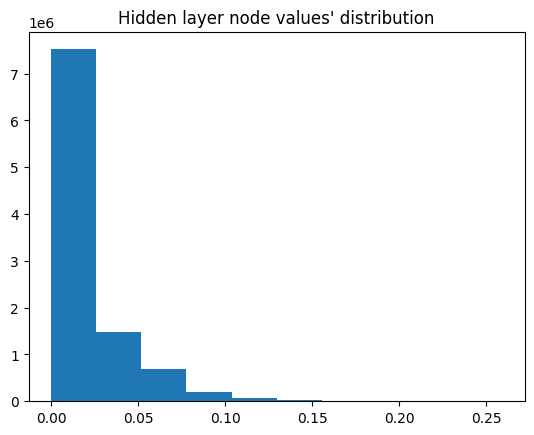

In [25]:
plt.hist(SNet(x)[1].cpu().detach().numpy().flatten())
plt.title("Hidden layer node values' distribution")
plt.show()

0 torch.Size([1000, 784])


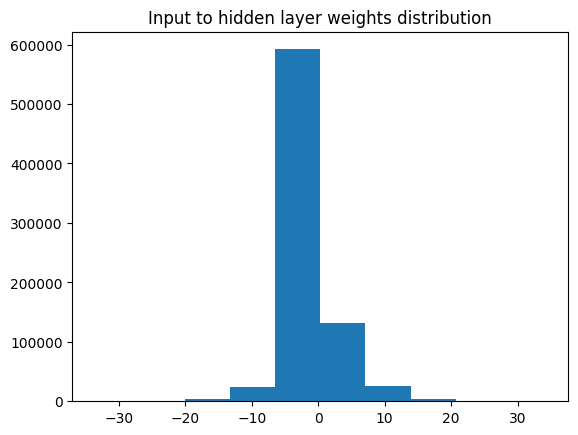

1 torch.Size([1000])


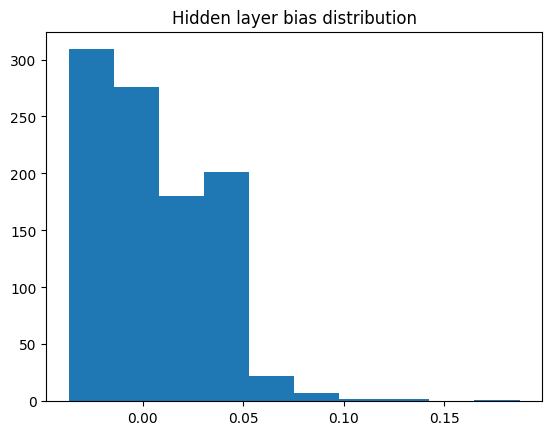

2 torch.Size([10, 1000])


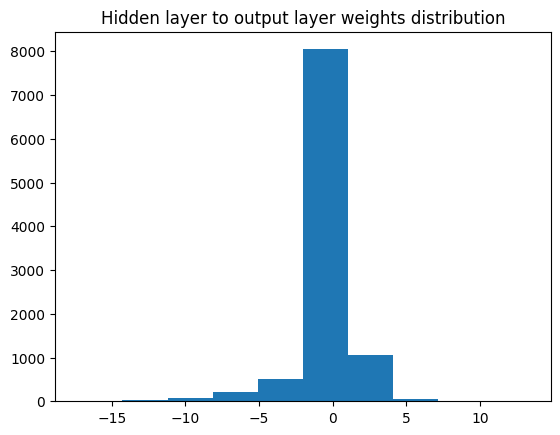

3 torch.Size([10])


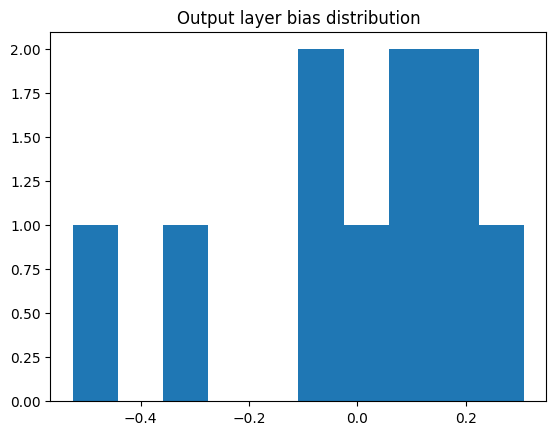

In [24]:
for ix, par in enumerate(SNet.parameters()):
    print(ix, par.shape)
    if ix == 0:
        plt.hist(par.cpu().detach().numpy().flatten())
        plt.title("Input to hidden layer weights distribution")
        plt.show()
    elif ix == 1:
        plt.hist(par.cpu().detach().numpy().flatten())
        plt.title("Hidden layer bias distribution")
        plt.show()
    elif ix == 2:
        plt.hist(par.cpu().detach().numpy().flatten())
        plt.title("Hidden layer to output layer weights distribution")
        plt.show()
    elif ix == 3:
        plt.hist(par.cpu().detach().numpy().flatten())
        plt.title("Output layer bias distribution")
        plt.show()

In [26]:
# the first distribution indicates the distribution of values in the hidden layer (where we can 
# see that the values have a very small range). Furthermore, given that both the input and hidden layer 
# values have a very small range, the weights had to be varied by a large amount (for both the weights that 
# connect the input to the hidden layer and the weights that connect the hidden layer to the output layer).
# Now that we know that the network doesn’t train well when the input values have a very small range, 
# let’s understand how batch normalization helps increase the range of values within the hidden layer

### Training the neural net with batch normalization

In [6]:
class FMNISTDataset(Dataset):
    def __init__(self, x, y):
        x = x.float()/(255*10000)
        x = x.view(-1,28*28)
        self.x, self.y = x, y 
    def __getitem__(self, ix):
        x, y = self.x[ix], self.y[ix]        
        return x.to(device), y.to(device)
    def __len__(self): 
        return len(self.x)

In [12]:
def get_model():
    class neuralnet(nn.Module):
        def __init__(self):
            super().__init__()
            self.input_to_hidden_layer = nn.Linear(784,1000)
            self.batch_norm = nn.BatchNorm1d(1000)
            self.hidden_layer_activation = nn.ReLU()
            self.hidden_to_output_layer = nn.Linear(1000,10)
        def forward(self, x):
            x = self.input_to_hidden_layer(x)
            x0 = self.batch_norm(x)
            x1 = self.hidden_layer_activation(x0)
            x2= self.hidden_to_output_layer(x1)
            return x2, x1
    SNet = neuralnet().to(device)
    loss_fn = nn.CrossEntropyLoss()
    optimizer = Adam(SNet.parameters(), lr=1e-3)
    return SNet, loss_fn, optimizer

In [8]:
def train_batch(x, y, SNet, optimizer, loss_fn):
    prediction = SNet(x)[0]
    batch_loss = loss_fn(prediction, y)
    batch_loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    return batch_loss.item()

In [13]:
def accuracy(x, y, SNet):
    with torch.no_grad():
        prediction = SNet(x)[0]
    max_values, argmaxes = prediction.max(-1)
    is_correct = argmaxes == y
    return is_correct.cpu().numpy().tolist()

In [14]:
def get_data():
    train = FMNISTDataset(tr_images, tr_targets)
    trn_dl = DataLoader(train, batch_size=32, shuffle=True)
    val = FMNISTDataset(val_images, val_targets)
    val_dl = DataLoader(val, batch_size=len(val_images), shuffle=True)
    return trn_dl, val_dl

In [18]:
trn_dl, val_dl = get_data()
SNet, loss_fn, optimizer = get_model()

In [19]:
def val_loss(x, y, SNet):
    SNet.eval()
    with torch.no_grad():
        prediction = SNet(x)[0]
    val_loss = loss_fn(prediction, y)
    return val_loss.item()

In [20]:
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []
for epoch in range(100):
    print(epoch)
    train_epoch_losses, train_epoch_accuracies = [], []
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, SNet, optimizer, loss_fn)
        train_epoch_losses.append(batch_loss)
    train_epoch_loss = np.array(train_epoch_losses).mean()
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, SNet)
        train_epoch_accuracies.extend(is_correct)
    train_epoch_accuracy = np.mean(train_epoch_accuracies)
    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        val_is_correct = accuracy(x, y, SNet)
        validation_loss = val_loss(x, y, SNet)
    val_epoch_accuracy = np.mean(val_is_correct)
    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_losses.append(validation_loss)  
    val_accuracies.append(val_epoch_accuracy)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [21]:
train_losses, train_accuracies, val_losses, val_accuracies

([0.5567332830309868,
  0.9298621486266454,
  0.6130666683038076,
  0.5639997726281484,
  0.5403288907965025,
  0.5197165109793345,
  0.504313157316049,
  0.4958653467655182,
  0.48231528828541437,
  0.4757113107919693,
  0.4710171120325724,
  0.4620749897758166,
  0.4573100321729978,
  0.4559664315978686,
  0.451832218337059,
  0.4448336557666461,
  0.4423776246388753,
  0.4407416059732437,
  0.4363477113286654,
  0.43701159884134927,
  0.4319779695192973,
  0.43033398984273274,
  0.4269391919970512,
  0.4257206071893374,
  0.4206047438820203,
  0.4168145222703616,
  0.4164769942442576,
  0.4147360550602277,
  0.4114383180300395,
  0.4142692189455032,
  0.4100956364115079,
  0.407446012878418,
  0.40123745046456655,
  0.4027223673144976,
  0.4008918367624283,
  0.39969128971298534,
  0.3971859076619148,
  0.39828827639818193,
  0.39474524353345236,
  0.3933960165699323,
  0.39349903180996576,
  0.391969488298893,
  0.3892390964150429,
  0.386939191532135,
  0.3902789716084798,
  0.384

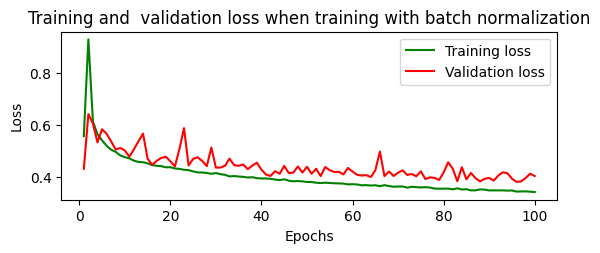

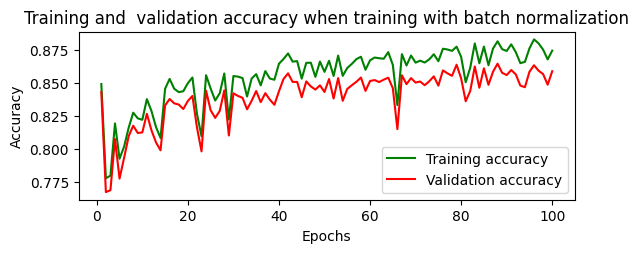

In [22]:
# Plotting the training and validation loss values
epochs = np.arange(100) + 1
plt.subplot(211)
plt.plot(epochs, train_losses, "g", label="Training loss")
plt.plot(epochs, val_losses, "r", label="Validation loss")
plt.title("Training and  validation loss when training with batch normalization")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# Plotting the training and validation accuracy values
plt.subplot(212)
plt.plot(epochs, train_accuracies, "g", label="Training accuracy")
plt.plot(epochs, val_accuracies, "r", label="Validation accuracy")
plt.title("Training and  validation accuracy when training with batch normalization")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

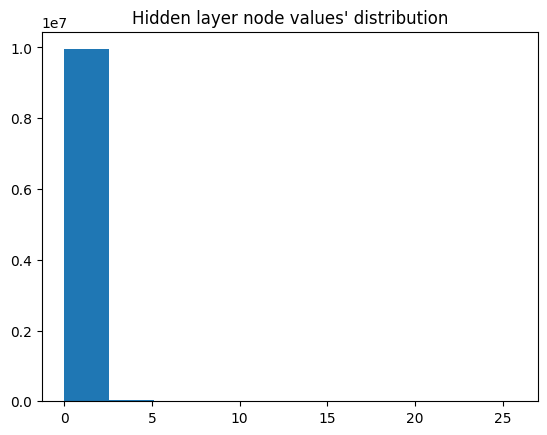

In [23]:
plt.hist(SNet(x)[1].cpu().detach().numpy().flatten())
plt.title("Hidden layer node values' distribution")
plt.show()

0 torch.Size([1000, 784])


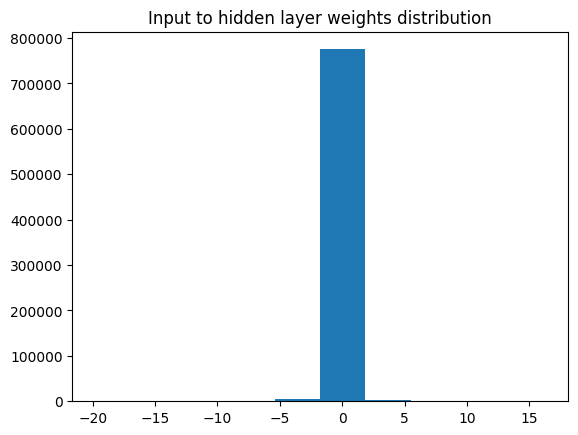

1 torch.Size([1000])


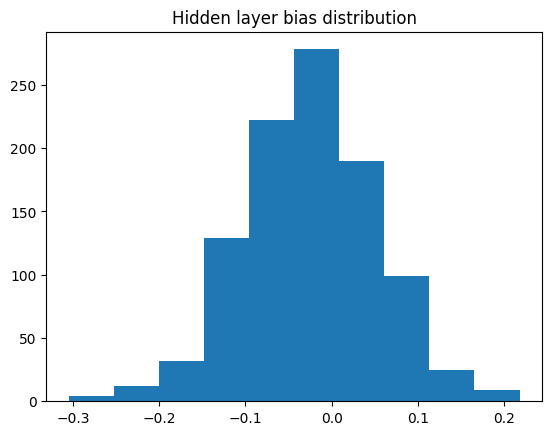

2 torch.Size([1000])


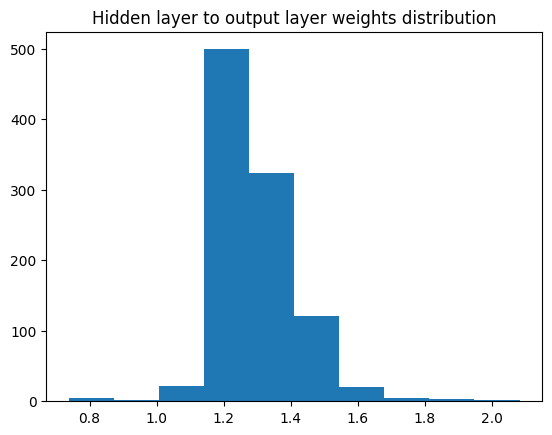

3 torch.Size([1000])


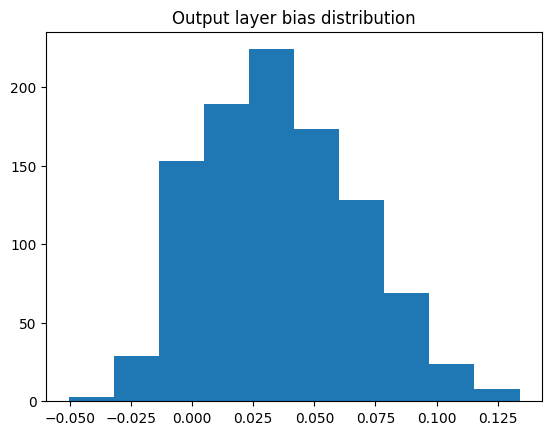

4 torch.Size([10, 1000])
5 torch.Size([10])


In [24]:
for ix, par in enumerate(SNet.parameters()):
    print(ix, par.shape)
    if ix == 0:
        plt.hist(par.cpu().detach().numpy().flatten())
        plt.title("Input to hidden layer weights distribution")
        plt.show()
    elif ix == 1:
        plt.hist(par.cpu().detach().numpy().flatten())
        plt.title("Hidden layer bias distribution")
        plt.show()
    elif ix == 2:
        plt.hist(par.cpu().detach().numpy().flatten())
        plt.title("Hidden layer to output layer weights distribution")
        plt.show()
    elif ix == 3:
        plt.hist(par.cpu().detach().numpy().flatten())
        plt.title("Output layer bias distribution")
        plt.show()

In [25]:
# Here we can see that the hidden layer values have a wider spread when we have batch normalization 
# and that the weights connecting the hidden layer to the output layer have a smaller spread. This 
# results in the neural net learning as effectively as it could in the previous sections. 